In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_moons
import keras
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [2]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

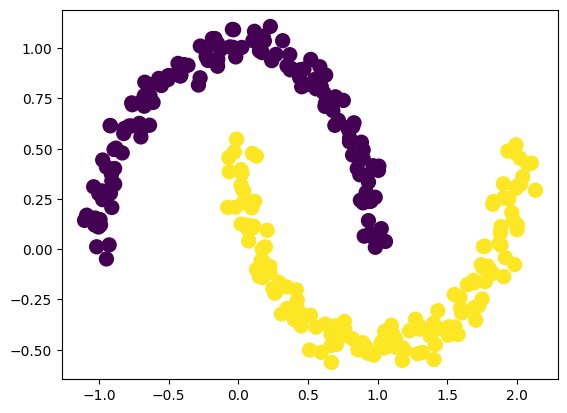

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,s=100)

In [4]:
m = Sequential()
m.add(Dense(10, activation='sigmoid', input_dim=2))
m.add(Dense(10, activation='sigmoid'))
# m.add(Dense(10, activation='sigmoid'))
# m.add(Dense(10, activation='sigmoid'))
# m.add(Dense(10, activation='sigmoid'))
# m.add(Dense(10, activation='sigmoid'))
# m.add(Dense(10, activation='sigmoid'))
# m.add(Dense(10, activation='sigmoid'))
# m.add(Dense(10, activation='sigmoid'))
# m.add(Dense(10, activation='sigmoid'))
m.add(Dense(10, activation='sigmoid'))
m.add(Dense(1, activation='sigmoid'))

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
m.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
m.get_weights()[0]

array([[-0.22012472,  0.4534443 ,  0.1700216 ,  0.39260346, -0.11872631,
         0.6322343 , -0.12222332, -0.38794994,  0.00749689, -0.4472261 ],
       [-0.35700166,  0.6547999 ,  0.10402924,  0.14326137,  0.24543089,
         0.32082742, -0.32853097,  0.16596079,  0.16027606, -0.00569761]],
      dtype=float32)

In [8]:
oldWeights = m.get_weights()[0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [10]:
X_train.shape

(240, 2)

In [11]:
m.fit(X_train, y_train, epochs=100)
# see the loss is constant

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5332 - loss: 0.6942
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4878 - loss: 0.7041
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5608 - loss: 0.6865 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5521 - loss: 0.6881 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5182 - loss: 0.6938 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5082 - loss: 0.6945 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5171 - loss: 0.6930 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5035 - loss: 0.6940 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5114 - loss: 0.6931 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5081 - loss: 0.6931  
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5134 - loss: 0.6926 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5385 - los

In [12]:
newWeights = m.get_weights()[0]

In [13]:
m.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [14]:
gradient = (oldWeights-newWeights)/0.001
percentageChange = abs(100*(oldWeights-newWeights)/oldWeights)


In [15]:
gradient

array([[  765.90625,  -525.0853 ,   874.067  ,  -581.9272 ,  -606.82056,
          727.6852 ,  -813.7206 ,  -202.29355,  -685.65295,   571.80743],
       [-1500.4501 ,  1103.0032 , -1482.0735 ,  1292.3124 ,  1068.9851 ,
        -1113.7911 ,  1401.5297 ,  -179.80045,  1255.6136 , -1314.1637 ]],
      dtype=float32)

In [16]:
percentageChange
# see the weights very very small change i.e very small change
# checked for 1 epoch:
# array([[0.00333265, 0.03221161, 0.00774751, 0.00366132, 0.00023453,
#         0.00843563, 0.00568014, 0.00501533, 0.00448916, 0.0129286 ],
#        [0.00493258, 0.00393301, 0.22176   , 0.00928881, 0.0006183 ,
#         0.00436514, 0.01168699, 0.00139138, 0.00615268, 0.00324092]],
#       dtype=float32)

# checked after 100 epochs:
# array([[0.00333265, 0.03221161, 0.00774751, 0.00366132, 0.00023453,
#         0.00843563, 0.00568014, 0.00501533, 0.00448916, 0.0129286 ],
#        [0.00493258, 0.00393301, 0.22176   , 0.00928881, 0.0006183 ,
#         0.00436514, 0.01168699, 0.00139138, 0.00615268, 0.00324092]],
#       dtype=float32) literray same
# this is vanishing gradient problem

# after having only one hidden layer

# array([[  71.80604 ,  290.43878 ,   98.90535 ,   99.45543 ,  657.5809  ,
#          170.04834 ,  174.44351 , 1030.1417  ,  572.2915  ,   65.955795],
#        [ 313.4489  ,  147.30998 ,  155.40677 ,  901.123   ,  374.5798  ,
#          226.42358 ,  218.24788 ,  176.04958 ,  686.6564  ,  218.18326 ]],
#       dtype=float32)


array([[  347.942   ,   115.7993  ,   514.0918  ,   148.22264 ,
          511.10876 ,   115.097404,   665.76544 ,    52.144245,
         9145.828   ,   127.85645 ],
       [  420.2922  ,   168.44891 ,  1424.6702  ,   902.0661  ,
          435.55444 ,   347.16208 ,   426.6051  ,   108.33912 ,
          783.4069  , 23065.186   ]], dtype=float32)